In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [269]:
data=pd.read_csv("forestfires.csv")

In [270]:
pd.set_option("display.max_columns", 31)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [271]:
data.shape

(517, 31)

In [272]:
data["month"].value_counts()


aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [273]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [274]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [275]:
data=data.drop_duplicates()

In [276]:
data.shape

(509, 31)

In [277]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


C:\Users\DEEPIKA SHERAWAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='rain'>

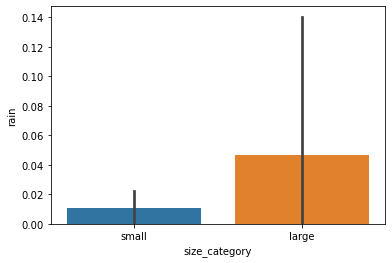

In [284]:
sns.barplot(data["size_category"],data["rain"])

In [286]:
y_count = data.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})


,size_category,counts
0,small,371
1,large,138


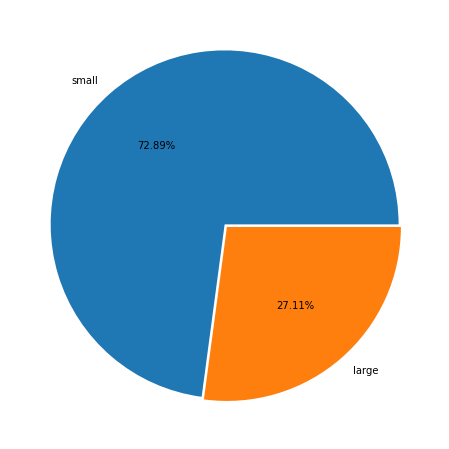

In [287]:
plt.figure(figsize=(8,8))
plt.pie(y_count.counts, labels=y_count['size_category'], autopct='%1.2f%%', explode=(0,0.02))
y_count

In [288]:
month_data = data.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_data.head(10)

,size_category,month,count
11,small,aug,135
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
13,small,feb,14
16,small,jun,13
6,large,mar,11
20,small,oct,11


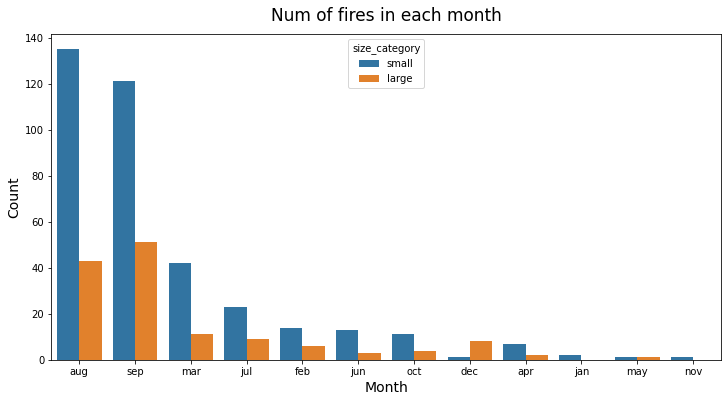

In [289]:
plt.figure(figsize=(12,6))
sns.barplot(x='month', y = 'count', hue='size_category', data= month_data)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [290]:
day_data = data.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_data

,size_category,day,count
10,small,sun,67
7,small,fri,62
9,small,sat,57
8,small,mon,55
11,small,thu,47
12,small,tue,43
13,small,wed,40
3,large,sun,27
2,large,sat,25
0,large,fri,21


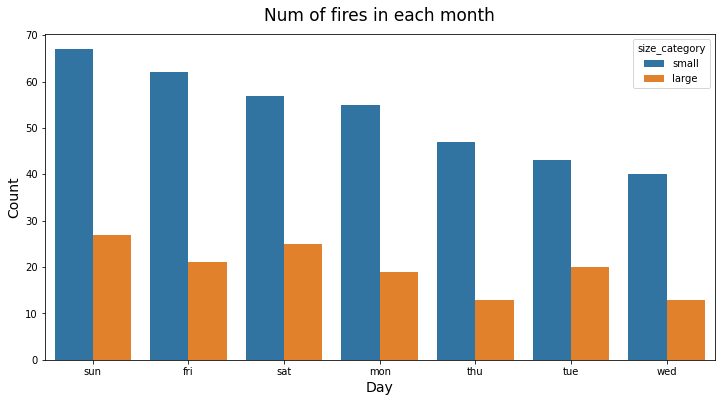

In [291]:
plt.figure(figsize=(12,6))
sns.barplot(x='day', y = 'count', hue='size_category', data= day_data)
plt.title("Num of fires on each day", fontsize=17, y=1.02)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [295]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data["month"]=label_encoder.fit_transform(data["month"])
data["day"]=label_encoder.fit_transform(data["day"])
data["size_category"]=label_encoder.fit_transform(data["size_category"])

In [296]:
array=data.values
X=array[:,0:30]
Y=array[:,30]

In [297]:
X.shape

(509, 30)

In [298]:
Y.shape

(509,)

In [299]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [300]:
from sklearn import metrics
model=SVC() #Default hyperparameters
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
metrics.accuracy_score(Y_test,y_pred)

0.7843137254901961

In [301]:
model=SVC(kernel="linear") 
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(metrics.accuracy_score(Y_test,y_pred))
confusion_matrix(Y_test, y_pred)

0.9901960784313726


array([[25,  0],
       [ 1, 76]], dtype=int64)

In [302]:
model=SVC(kernel="poly") 
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(metrics.accuracy_score(Y_test,y_pred))
confusion_matrix(Y_test, y_pred)

0.7941176470588235


array([[ 4, 21],
       [ 0, 77]], dtype=int64)

In [303]:
model=SVC(kernel="rbf") 
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(metrics.accuracy_score(Y_test,y_pred))
confusion_matrix(Y_test, y_pred)

0.7843137254901961


array([[ 3, 22],
       [ 0, 77]], dtype=int64)

# Grid Search CV

In [304]:
model = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[100,50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,15,14,13,12,11,10,0.1] }]
gsv = GridSearchCV(model,param_grid,cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [100, 50, 5, 10, 0.5, 1, 0.001, 0.0001,
                                    1e-05],
                          'kernel': ['rbf']}])

In [305]:
gsv.best_params_ , gsv.best_score_ 

({'C': 12, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.8940853658536586)

In [306]:
model1= SVC(C= 12, gamma = 0.0001,kernel="rbf")
model1.fit(X_train , Y_train)
y_pred = model1.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 95.09803921568627


array([[20,  5],
       [ 0, 77]], dtype=int64)

# ROC-AUC_Curve

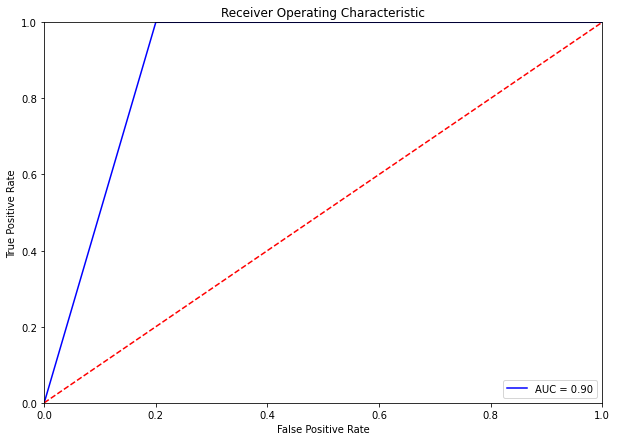

In [307]:
plt.figure(figsize=(10,7))
y_pred = model1.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()